<a href="https://colab.research.google.com/github/romangasp/machine-learning/blob/main/RegressionLinealExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('./sample_data/housing.csv')


In [ ]:
data.head();

In [ ]:
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

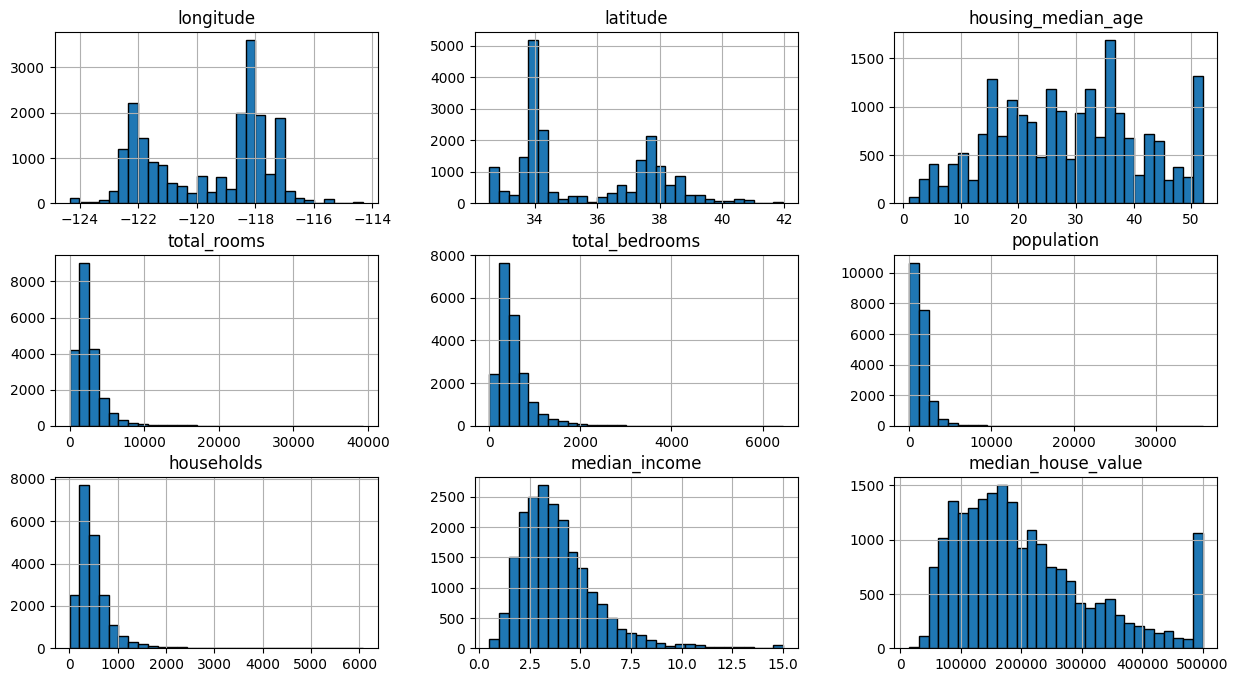

In [ ]:
data.hist(
  figsize=(15,8),
  bins=30,
  edgecolor='black'
)

TypeError: cannot convert the series to <class 'float'>

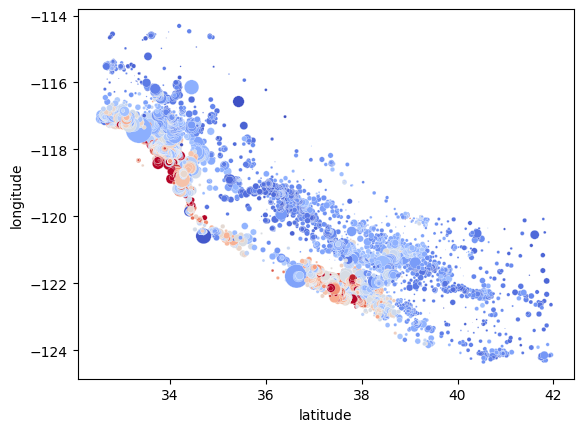

In [ ]:
import seaborn as sb
sb.scatterplot(x="latitude",y="longitude",data=data,hue="median_house_value", palette="coolwarm",
               s=data["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

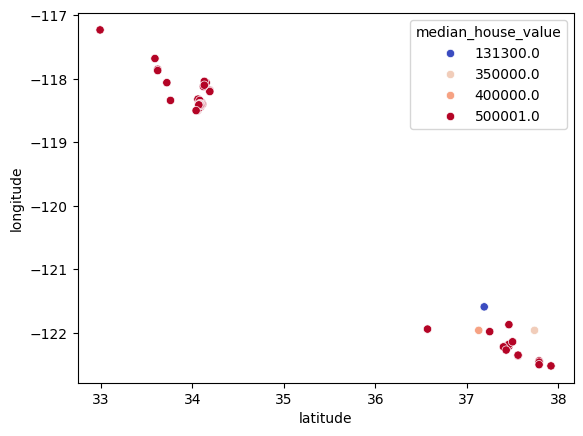

In [ ]:
sb.scatterplot(x="latitude",y="longitude", data=data[(data.median_income > 14)], hue="median_house_value", palette="coolwarm")

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data_na = data.dropna()

In [ ]:
data_na.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#convertir la caracteristica categorica a numerica
#proximidad al oceano

data_na["ocean_proximity"]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [ ]:
data_na["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [ ]:
#Dummies / One-hot encoding

dummies = pd.get_dummies(data_na["ocean_proximity"], dtype=int
)

In [ ]:
data_na = data_na.join(dummies)

In [ ]:
data_na.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [ ]:
data_na = data_na.drop(["ocean_proximity"],axis=1)

In [ ]:
data_na.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
#analisis, nuevas caracteristicas



<Axes: >

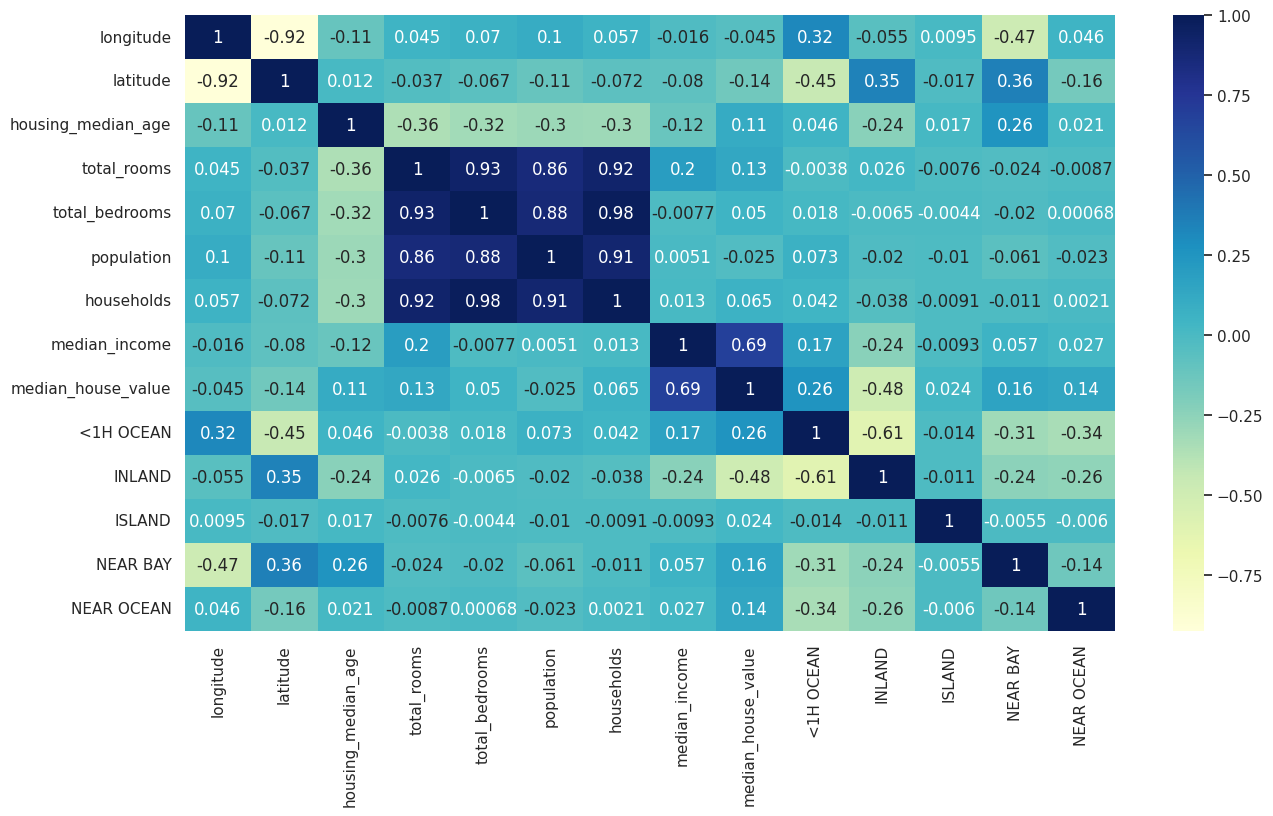

In [ ]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data_na.corr(),annot=True, cmap="YlGnBu")

In [ ]:
data_na.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


In [ ]:
data_na.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


<Axes: xlabel='median_house_value', ylabel='median_income'>

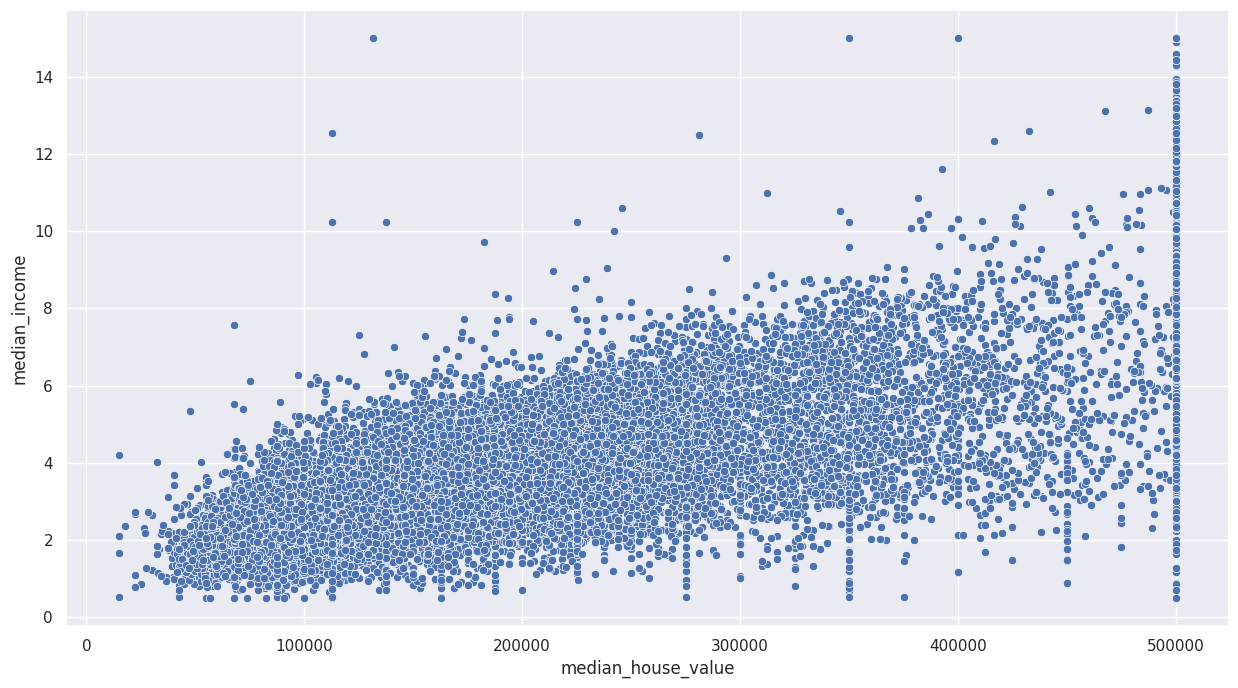

In [ ]:
sb.scatterplot(x=data_na["median_house_value"],y=data_na["median_income"])

In [ ]:
data_na["bedroom_ratio"] = data_na["total_bedrooms"] / data_na["total_rooms"]

In [ ]:
#separate the characteristics to the tag
x = data_na.drop(["median_house_value"],axis=1)
y = data_na["median_house_value"]

In [ ]:
#Separate the data in two parts, a set training and another one to try
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [ ]:
x_train.shape

(16346, 14)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
pd.DataFrame(predictions)

,0
0,126035.387254
1,85673.732670
2,211840.438141
3,140637.706905
4,270298.303698
...,...
4082,60757.743667
4083,111660.660845
4084,94958.408190
4085,189199.499357


In [ ]:
comparative = {"Prediction" : predictions, "Real Value": y_test}
pd.DataFrame(comparative)

,Prediction,Real Value
2383,126035.387254,107600.0
13504,85673.732670,70500.0
8784,211840.438141,383800.0
5969,140637.706905,202200.0
10561,270298.303698,242800.0
...,...,...
12434,60757.743667,68900.0
13303,111660.660845,116300.0
13866,94958.408190,124400.0
14780,189199.499357,139500.0


In [ ]:
#Overfitting sobreajuste, cuando aprende mucho los datos de entrenamiento,
# pero no puede generalizar entonces los datos de prueba que nunca habia visto le va bastante mal

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.6537276525403573
0.645146401190266


In [ ]:
#Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test,predictions)

In [ ]:
mse


4771705736.733828

In [ ]:
rmse= np.sqrt(mse)

In [ ]:
rmse

np.float64(69077.5342404014)

In [ ]:
#scaler escalamiento

In [ ]:
data_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,0.219892


In [ ]:
data_na.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_escalate = scaler.fit_transform(x_train)
x_test_escalate = scaler.fit_transform(x_test)

In [ ]:
pd.DataFrame(x_train_escalate)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.168309,0.456844,1.857219,-0.876125,-0.899233,-0.980550,-0.942058,-0.234358,-0.888251,-0.685828,-0.017492,-0.354951,2.623240,0.150376
1,-1.397827,0.793269,0.347119,-0.726168,-0.784184,-0.903579,-0.891836,2.048891,-0.888251,-0.685828,-0.017492,-0.354951,2.623240,-0.249406
2,0.802551,-0.842132,0.426598,-0.808967,-0.918408,-0.771756,-0.912982,0.519262,1.125808,-0.685828,-0.017492,-0.354951,-0.381208,-0.655718
3,0.797561,-0.856149,-0.845066,0.514427,0.819314,0.760582,0.836839,-0.083319,1.125808,-0.685828,-0.017492,-0.354951,-0.381208,0.376257
4,0.573033,-0.739335,0.744514,0.160694,0.306386,-0.264810,0.194533,0.164051,1.125808,-0.685828,-0.017492,-0.354951,-0.381208,0.176877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-1.298037,1.059605,0.188161,2.100936,0.814520,0.890636,0.910849,3.711270,-0.888251,-0.685828,-0.017492,2.817290,-0.381208,-1.589359
16342,0.677813,-0.706627,0.506077,0.161154,-0.024380,0.170473,0.117879,0.998920,1.125808,-0.685828,-0.017492,-0.354951,-0.381208,-0.633416
16343,0.573033,-0.814096,-0.129755,-0.504453,-0.381512,-0.768217,-0.455703,0.804156,1.125808,-0.685828,-0.017492,-0.354951,-0.381208,0.575115
16344,0.727708,-0.758025,0.267640,-0.388075,-0.019586,0.006799,0.049155,-1.044789,1.125808,-0.685828,-0.017492,-0.354951,-0.381208,1.444120
